In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# # Define 4 ODE 
# n_step = 10000
# v_r = np.zeros(n_step)
# v_theta = np.zeros(n_step)
# r = np.zeros(n_step)
# theta = np.zeros(n_step)

# #Setting initial conditions
# v_r[0] = 19400
# v_theta[0] = 2 * np.pi / 86400
# r[0] = 146608000000
# theta[0] = 0.001


# # Take in energy and angular momentum to initiate

# G = 6.674e-11
# L = 2.67e40
# dt = 0.00001

In [56]:
# Define 4 ODE 
n_step = 10000
v_r = np.zeros(n_step)
v_theta = np.zeros(n_step)
r = np.zeros(n_step)
theta = np.zeros(n_step)

#Setting initial conditions
v_r[0] = 19400
v_theta[0] = 2 * np.pi / 86400
r[0] = 146608000000
theta[0] = 0.001


# Take in energy and angular momentum to initiate

G = 6.674e-11
L = 2.67e40
dt = 0.00001

In [57]:
for i in range(n_step-1):
    # Use k g h l as value storers in each rk4 step
    k1 = v_r[i]
    g1 = v_theta[i]
    h1 = r[i] * v_theta[i] **2 - G * L / r[i]**2
    l1 = -2 * v_r[i] * v_theta[i] / r[i]

    r_tempt_1 = r[i] + k1 * dt/2
    theta_tempt_1 = theta[i] + g1 * dt /2
    v_r_tempt_1 = v_r[i] + h1 * dt /2
    v_theta_tempt_1 = v_theta[i] + l1 * dt/2

    # Step 2
    k2 = v_r_tempt_1
    g2 = v_theta_tempt_1
    h2 = r_tempt_1 * v_theta_tempt_1 **2 - G * L / r_tempt_1**2
    l2 = -2 * v_r_tempt_1 * v_theta_tempt_1 / r_tempt_1

    r_tempt_2 = r[i] + k2 * dt/2
    theta_tempt_2 = theta[i] + g2 * dt /2
    v_r_tempt_2 = v_r[i] + h2 * dt /2
    v_theta_tempt_2 = v_theta[i] + l2 * dt/2

    # Step 3
    k3 = v_r_tempt_2
    g3 = v_theta_tempt_2
    h3 = r_tempt_2 * v_theta_tempt_2 **2 - G * L / r_tempt_2**2
    l3 = -2 * v_r_tempt_2 * v_theta_tempt_2 / r_tempt_2

    r_tempt_3 = r[i] + k3 * dt/2
    theta_tempt_3 = theta[i] + g3 * dt /2
    v_r_tempt_3 = v_r[i] + h3 * dt /2
    v_theta_tempt_3 = v_theta[i] + l3 * dt/2

    # Step 4
    k4 = v_r_tempt_3
    g4 = v_theta_tempt_3
    h4 = r_tempt_3 * v_theta_tempt_3 **2 - G * L / r_tempt_3**2
    l4 = -2 * v_r_tempt_3 * v_theta_tempt_3 / r_tempt_3

    r[i+1] = r[i] + dt * (k1 + 2* k2 + 2*k3 + k4)/ 6
    theta[i+1] = theta[i] + dt * (g1 + 2* g2 + 2*g3 + g4)/ 6
    v_r[i+1] = v_r[i] + dt * (h1 + 2* h2 + 2*h3 + h4)/ 6
    v_theta[i+1] = v_theta[i] + dt * (l1 + 2* l2 + 2*l3 + l4)/ 6




In [58]:
x = r * np.cos(theta)
y = r * np.sin(theta)

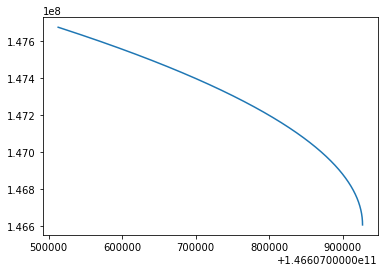

In [59]:
plt.plot(x, y)

In [69]:
# Comparison to analytical method
m1 = 1.989e30 #sun mass
m2 = 5.97219e24 # earth mass
m = (m1 * m2) / (m1 + m2)
alpha = G * m1 * m2
a = 1.495e11
e = 0.017
theta = np.linspace(0, 2 * np.pi, 100)

p = L**2 / m / alpha
 # to check
p2 = a * (1 - e)**2
print(p)
print(p2)

r = p / (1 + e * np.cos(theta))

x = r * np.cos(theta)
y = r * np.sin(theta)



150569015012.38382
144460205500.0


In [70]:
np.linspace(0, 2 * np.pi, 100)

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

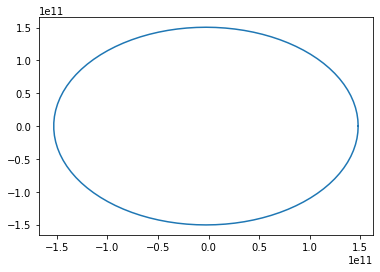

In [71]:
plt.plot(x, y)